# Geospatial & Numerical Libraries

Up until now, we have stuck to using the standard library.  That is, every installation of Python 3.5 that you will ever encounter has the exact same set of functionality as your installation.  The standard library is well suited to solve many tasks, but one of the major strengths of Python is the breadth of available libraries.  These libraries can significantly reduce development time as someone else has already written some piece of functionality and (hopefully) exposed it via a robust, well documented, [Application Programming Interface](http://readwrite.com/2013/09/19/api-defined/) (API).

Unfortunately, the use of an external library is not without some cost.  The primary cost is that of a [dependency](https://en.wikipedia.org/wiki/Dependency_hell).  Any user of your software, that uses an external library, must also have installed the same version of the same library.  For example, if I write sections of my code utilizing the NumPy library, I am requiring that all of my users also have the NumPy library.  Most library developers work exceptionally hard to ensure maximum backwards compatability.  This means that, if I use NumPy version 0.1 and you have NumPy 0.2 installed, everything should (~~hopefully~~, maybe) work.

This week, we will step through a few different numerical and geospatial libraries.  The numerical libraries (NumPy, SciPy, and Pandas) should all already be installed with your Anaconda Python installation.  In fact, these three libraries have become so prevelent that many developers simply assume that they are available.  I caution against assuming this - for example, the ArcMap 10.x installation does not include SciPy or Pandas.

## NumPy<img src="images/NumPy_logo.png" /img>

[NumPy](http://docs.scipy.org/doc/numpy-1.10.1/user/whatisnumpy.html) is a library that supports high perforomance mathematical operations applied to structured data types, e.g. vectors, multi-dimensional arrays, matrices, masked arrays.  The primary method for interacting with data in NumPy is the ndarray (n-dimensional array).  The ndarray is a fixed size, fixed data type container.  That is, all of the data within an ndarray must be of the same type (all entries are float64 for example).  For example:

In [11]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print(x)
print('The sum of the entire array is {}'.format(np.sum(x)))
print('The sum of each row of the array is {}'.format(np.sum(x, axis=1)))
print('The sum of each column of the array is {}'.format(np.sum(x, axis=0)))

[[1 2 3]
 [4 5 6]]
The sum of the entire array is 21
The sum of each row of the array is [ 6 15]
The sum of each column of the array is [5 7 9]


Why might you want to limit yourself to utilizing a data structure where all elements must be the same type, when Python offers excellent support for dynamic types?  For example, the following is valid Python, but could not be utilized in NumPy: `x = ['a', 1, 2.0, foo]`, where foo is a function.  The answer is performance.  The link above describes how NumPy achieves such exceptional performance.  The shoft version is pre-compiled C.  By pre-compiling to a 'low-level' language, NumPy can achieve extremely high performance (when compared to standard Python).  Take the following for example:

In [24]:
def my_sum(a,b):
    """
    A simply, pure Python summation function
    """
    return sum(range(a,b+1))
%timeit my_sum(0,1000)
%timeit np.sum(np.arange(0,1001))


100000 loops, best of 3: 18 µs per loop
The slowest run took 9.03 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.66 µs per loop


Here, we can see that NumPy is approximately 4.5x faster than standard Python.  Notice too that the code is significantly shorter.  Shorter code (assuming it is readable and well documented) reduces the potential to introduce bugs.

In addition to performance, NumPy offers a wealth of mathematical functionality.  This is code that has been optimized to work with the ndarray data type, is well tested, and utilized by tens of thousands of users day in and day out.  The final point is worth reiterating; this code is highly tested by many people.  I trust NumPy code more than I trust my own code to be bug free.

Please take a few minutes to look through [J.R. Johanson's wonderful NumPy iPython notebook](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb).  His tutorial will give you a few ideas where you might be able to swap some NumPy functionality in for current pure Python code.

## SciPy
[SciPy](http://docs.scipy.org/doc/scipy/reference/) (Scientific Python) is built ontop of NumPy and offers additional high level optimization, engineering, and scientific analysis functionality.  Checkout the previous link to get a listing of the available modules and to get a feel for what capabilities are available.  Just like NumPy, SciPy is highly optimized (read, awesome performance) to work with the ndarray datatype.  Of particular interest to us is the module [`scipy.spatial`](http://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html).  This is a relatively new library that adds support for basic spatial data structures and analyses.  This is **not** a full featured set of spatial analysis tools, but a low level library to get started with some basic spatial work.

Before we look at the spatial capabilities, take a moment to scroll through [J.R. Johanson's SciPy iPython notebook](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb).

In [25]:
# SciPy works primarily with ndarrays.  Therefore, if we want to create a point, we need to do it with an array
point_a = np.array([1,1])
point_b = np.array([1.5, 1.5])

# Now we want to import scipy.spatial and alias it to something easy to type
import scipy.spatial as ss

In [26]:
# What is available in the scipy.spatial namespace?
dir(ss)

['ConvexHull',
 'Delaunay',
 'KDTree',
 'Rectangle',
 'Tester',
 'Voronoi',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_distance_wrap',
 '_plotutils',
 '_procrustes',
 'absolute_import',
 'bench',
 'cKDTree',
 'ckdtree',
 'convex_hull_plot_2d',
 'delaunay_plot_2d',
 'distance',
 'distance_matrix',
 'division',
 'kdtree',
 'minkowski_distance',
 'minkowski_distance_p',
 'print_function',
 'procrustes',
 'qhull',
 'test',
 'tsearch',
 'voronoi_plot_2d']

In [27]:
# Compute the euclidean distance between the two points
ed = ss.distance.euclidean(point_a, point_b)
print('The Euclidean distance between A and B is {}'.format(ed))

# Compute the manhattan distance between the two points
md = ss.distance.cityblock(point_a, point_b)
print('The Manhattan distance between A and B is {}'.format(md))

The Euclidean distance between A and B is 0.7071067811865476
The Manhattan distance between A and B is 1.0


Before you ask: why on Earth would I ask you to code the euclidean and manhattan distances as functions when SciPy.spatial includes everything you need?  Two reasons.  First, coding those functions is wonderful practice.  Think about all of the low level Python 'things' that are going on.  You wrote a function, you used the `math` module, you accessed a tuple positionally (`x[0]`) or called a method within a method (`getx(x)`).  Second, you need to understand what exactly is happening inside of a function before you start using it.  That is not to suggest that you always need to code your own before using someone elses, but you should understand the mathematics and logic of what should be coming out.  How else do you catch someone else's bugs?

In this next example, we are going to take a look at using a highly performant data structure to help make finding nearest neighbors that much faster.  Enter the KD-Tree (image from: http://algoviz.org/OpenDSA/Books/Everything/html/KDtree.html#):

<img src="images/KDtree.png" /img>

This is space partitioning tree that supports extremely efficient insertion, deletion, and search for n-dimensional data.  In reality the KDTree is highly efficient to about 20 dimensions, after that brute force methods (what we are doing now) are about as effective (average case).  Luckily, we are working with point data, so 2D is well within the high performance threshold.  The basic idea is to parititon space and reduce the number of decisions that must be made during traversal.  In other words, every time that we have a point in 2D space the current search area is bisected by a hyperplane (a line in 2D space).  Using the image above, the first point is A.  The entire region is then split in two: points to the right of A and points to the left of A.  This process continues until a full tree is created.  Using this tree, it is then possible to rapidly search for the nearest neighbor.  Let's take a look at how this can be done using NumPy (to create a random point pattern) and SciPy (to create and query a KD-Tree).

Populating the interactive namespace from numpy and matplotlib


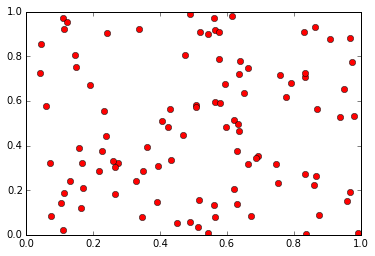

In [28]:
# Create 100 random points, drawn from a uniform random distirbution, in the domain (0,1)
points = np.random.random((100,2))

# You can safely ignore this for now, I am including it to show you what our pattern looks like
%pylab inline
plot(points[:,0], points[:,1], 'ro')

# Looks CSR to me, but you have better run a test later to be sure.  Maybe check the mean nearest neighbor distance...

The SciPy KDTree is available via an API.  In order to use the KDTree, I need to check out the [KD-Tree documentation](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html).  Here I see that the only required argument are the points (we can leave leaf size at the default).  The KD-Tree then has a few methods.  For now, it looks like `query` will be most useful for finding nearest neighbors.  Let's see what this might look like.

In [29]:
#Create an instance of the tree class
kdtree = ss.KDTree(points)

#Query the tree class for all of the points
for p in points:
    nearest_neighbor_distance, nearest_neighbor = kdtree.query(p, k=2)
    print(nearest_neighbor_distance, nearest_neighbor)
    break

[ 0.          0.06778767] [ 0 78]


Here I broke after just one iteration to explore what is going on.  A look at the [`query` documentation] (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) shows that the only required argument is a point.  Why might I have included k=2?  We need to find the two nearest neighbors because we loaded all of the points in the point pattern into our KD-Tree.  The nearest neighbor, when searching for a point already in the tree will always be itself (or another coincident point)!

The return value is the distance and the index of the nearest point.  Both as arrays.  We want the second entry, so we use positional indexing to get at them.  To create an array of nearest neighbor distance we can do the following:

In [30]:
#Create an instance of the tree class
kdtree = ss.KDTree(points)

#Query the tree class for all of the points
nn_distances = []
for p in points:
    nearest_neighbor_distance, nearest_neighbor = kdtree.query(p, k=2)
    nn_distances.append(nearest_neighbor_distance[1])
nn_distances = np.array(nn_distances)
print(nn_distances)
print(np.sum(nn_distances))
print(np.mean(nn_distances))

[ 0.06778767  0.02317471  0.06432162  0.00687176  0.01840382  0.06641539
  0.0581057   0.04816009  0.04227183  0.04035238  0.03995427  0.06162984
  0.09230259  0.05606818  0.0321899   0.05997496  0.04650988  0.06832677
  0.03811433  0.05229348  0.03860022  0.03664623  0.0721603   0.08638977
  0.09328599  0.14734755  0.06531845  0.04757874  0.04227183  0.01952536
  0.11171103  0.03860022  0.14007255  0.03419156  0.0778083   0.04757874
  0.08842906  0.05997496  0.01840382  0.03583886  0.09894021  0.02154259
  0.04816009  0.11337025  0.06980318  0.02025336  0.04650988  0.06500302
  0.0469394   0.07396803  0.01178897  0.0469394   0.04649501  0.0327281
  0.09583289  0.02154259  0.05494669  0.02317471  0.06264579  0.04649501
  0.09894021  0.11181302  0.10412698  0.06710261  0.02025336  0.01025915
  0.05233384  0.07963883  0.03869047  0.06528198  0.01684622  0.03583886
  0.05233384  0.00687176  0.0778083   0.03902637  0.03362362  0.03912983
  0.06778767  0.05494669  0.0601883   0.05329231  0.

Using the above example, I suspect that you could swap out some of the current point pattern class to leverage one of these high level libraries.  One potential concern will be - how do you handle the fact that the Point class stores `x` and `y` attributes?  I leave it to you to explore potential solutions.

## PySAL
Here at ASU, we develop the Python Spatial Analysis Library ([PySAL](http://pysal.readthedocs.org/en/latest/)).  Dr. Sergio Rey and Dr. Luc Anselin (in the geography department) both lead development and many current and former geography graduate students have contributed to the software.

To get PySAL installed on your system, open a terminal and execute `pip install pysal`.  After a bit of output, you should be able to import PySAL.

In [1]:
import pysal as ps

PySAL offers a wealth of available functionality.  We are just going to scratch the surface and use an example dataset (crime data from New Haven, CT) and the shapefile reader.

In [9]:
shapefile = ps.open(ps.examples.get_path('new_haven_merged.shp'))
dbf = ps.open(ps.examples.get_path('new_haven_merged.dbf'))

for geometry, attributes in zip(shapefile, dbf):
    print(geometry, attributes)
    break

(-72.976512, 41.337662) [' Thu, Sept. 18th 2014', 'all-cases-dead-on-arrival', ' 1605 WHALLEY AVE', ' AMITY/POND LILY', ' 01:53 p.m.']


Line by line, here is what the above example does:

  1. Open the shapefile
  2. Open the associated database file  
For those of you that are new to shapefiles, the format stores geometries in a binary file (.shp) and attributes in the dBase II format (.dbf).  This is definitely a legacy format with a number of nasty gotchas and limitations.  Alas, it is what we are stuck with while the broader community continues to utilize shapefiles.
  3. Intentional whitespace
  4. Here we iterate over both the shapefile and dbf at the same time.  Checkout the [`zip`](https://docs.python.org/3/library/functions.html#zip) documentation for more info on how this works.
  5. Print an example of the output
  6. Break, since the dataset has 3298 individual point observations and we do not want to print them all.

PySAL has a [Point class](https://github.com/pysal/pysal/blob/master/pysal/cg/shapes.py#L39), but I think that the Point class you have been developing has a few nice additions.  Therefore, for the assignment, you are going to take the output from the PySAL reader, extract the coordinates, and create a PointPattern (or whatever name you selected for your Point Pattern class) from the shapefile.  Basically, PySAL is going to provide the same dataset and the input/output (I/O) functionality.

### Additional Readings:
The readings this week are intentionally light because I expect that you will (1) run through J.R. Johanson's NumPy and SciPy tutorials.  I also anticipate it taking a bit of time to figure out how best to get a point pattern class populated with a set of points.  To get you thinking about that final point:

You currently have a point class that is written in pure python.  You know that that class works, but have just learned that the performance might be poor when many points are created.  Even discounting the python vs. pre-compiled C differences, a nearest neighbor search as we have coded it has an $O(n^{2})$ runtime, while a KD-TRee is average case $O(\log{n})$ for insertion and search (a hefty performance difference).  How then can you store points with attributes while still maintaining a numpy n-dimensionally array that the KD Tree would like?

A few options (that may not be the best!):
1. Store points in a point pattern and be able to create an array of coordinates on the fly.
2. As a point is added to the point pattern, also add the coordinates to an array (be aware that every time an array changes shape, it is copied).
3. Add an attribute to your Point class that returns an array [x,y] and then stack those to generate the necessary numpy array in one go (see the cell below for how you can do this).

Keep in mind that, no matter the solution, you want to be able to utilize the mark.  For example, what is the average nearest neighbor distance for all instances of 'window-breaking' in the dataset?  What about 'animal-nuisance'?

In [13]:
a = np.array([1,1])
b = np.array([2,2])
np.vstack((a,b))

array([[1, 1],
       [2, 2]])

# Week 11 Deliverables (E7) - Due 4/5/16
For this week make sure that you have completed the following:
    
* Fork Assignment 8 to your own github repository.
    * You can access assignment 8 [HERE](https://github.com/Geospatial-Python/assignment_08)
* Clone the repository locally

## Deliverables
1. Copy over your work from assignment 7.
1. Update the point pattern class to:
    * utilize a `scipy.spatial.KDTree` to compute the nearest neighbor distance
        * as a bit of stretch to try (not required) create a manhattan nearest (`tree.query(k=2, p=1)`) and a euclidean nearest (`tree.query(k=2, p=2)`).  Try using `functools.partial` to really extend this out and have a super clean API - **NOT REQUIRED**
    * compute the nearest neighbor distance using `numpy` (ndarray and mean)
    * compute the G function using `numpy`
    * Generate random points within some domain (you have this 99% coded already).  If the domain is not speficied use (0,1).  If it is specified (as will be the case when you use the New Haven example), set the domain using the points MBR.
    * Hint:
    ```python
    np.random.uniform(-1, 1, (2,2))  # Try this out in a terminal to see what it is doing.
    ```
1. Update the point pattern tests to:
    * Test the nearest neighbor distance results from the KD-Tree against your original implementation.
1. Write a script (or an iPython notebook - your choice) to do some point pattern analysis using the code you have developed:
    * Utilize the example shapefile from PySAL
    * Illustrate the use of mean nearest neighbor and the G function on:
        * The entire dataset
        * At least 2 different marks
    * Hint:
 
    ```python
    from pointpattern import PointPattern
    import pysal as ps
    
    # Open the shapefile using the example above and read in the points
    # attributes[1], in the above example, is the mark
    
    # Run a few tests to explore the dataset.
    nn = mean_nearest(interesting_mark='some_mark')
    print('This interesting mark has a nearest neighbor distance of {}'.format(nn))
    # Use your monte carlo simulation code to see if the result is statistically significant
    print('The mark is / is not significant.')
    
    ```
1. Update any other support code as necessary.